<a href="https://colab.research.google.com/github/SinghKajal21/web-scraping-for-sentiment-analysis/blob/main/Web_Scrapping_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
url ="https://www.amazon.in/dp/B08697N43G/ref=s9_acsd_al_bw_c2_x_0_i?pf_rd_m=A1K21FY43GMZF8&pf_rd_s=merchandised-search-1&pf_rd_r=XFRGH08185TP1KGE55MP&pf_rd_t=101&pf_rd_p=19a7d76e-31d3-47d1-a7a4-af8c9332648f&pf_rd_i=22166612031"
headers =  ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [4]:
def get_soup(url):
 r = requests.get(url, headers=headers,params={'url': url, 'wait': 2})
 soup = BeautifulSoup(r.text, 'html.parser')
 return soup

In [5]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
      for item in reviews:
        review = {'Reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),}
        reviewlist.append(review)
    except:
     pass

In [6]:
for x in tqdm_notebook(range(1,500)):
 soup = get_soup(f'https://www.amazon.in/dp/B08697N43G/ref=s9_acsd_al_bw_c2_x_0_i?pf_rd_m=A1K21FY43GMZF8&pf_rd_s=merchandised-search-1&pf_rd_r=XFRGH08185TP1KGE55MP&pf_rd_t=101&pf_rd_p=19a7d76e-31d3-47d1-a7a4-af8c9332648f&pf_rd_i=22166612031')
 get_reviews(soup)
 if not soup.find('li', {'class': 'a-disabled a-last'}):
  pass
 else:
  break

  0%|          | 0/499 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)

In [8]:
df.head()


,Reviews
0,"Like the product, screen touch is little hard ..."
1,Like it. Good product\nRead more
2,All in one with best battery 🔋 backup very muc...
3,It's awesome phone under this price i got this...
4,Budget fraindly phone\nRead more


In [9]:
df.tail()

,Reviews
1217,"Produto bom pelo preço ótimo, vendedor atencio..."
1218,"Amei meu produto , superou as minhas expectati..."
1219,Todo bien con el paquete. Comento que la resol...
1220,Producto que viene de la india. No se que sopo...
1221,"Chegou extremamente atrasado, tentei diversos ..."


In [10]:
df.shape

(1222, 1)

In [11]:
df.columns

Index(['Reviews'], dtype='object')

In [12]:
df.duplicated().sum()

1209

In [13]:
df.isnull().sum()

Reviews    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1222 non-null   object
dtypes: object(1)
memory usage: 9.7+ KB


In [15]:
text_total = " ".join(df["Reviews"])

In [16]:
text_total[:2000]

'Like the product, screen touch is little hard to operate.....\nRead more Like it. Good product\nRead more All in one with best battery 🔋 backup very much good\nRead more It\'s awesome phone under this price i got this mobile 4/64gb in just rs 7499\nRead more Budget fraindly phone\nRead more Nice mobile phone at this price\nRead more Very nice pics value of money\nRead more Good\nRead more Produto bom pelo preço ótimo, vendedor atencioso. Precisou trocar a cor do produto e me surpreendeu a cor nova eu amei, vendedor mandou até um fone de brinde. Só não gostei que no app ake da Amazon tava com 3 de ram, e chegou um com 2 de ram. Do resto vale a pena\nRead more Amei meu produto , superou as minhas expectativas, Camara muito boa , tudo maravilhoso e ele em si e muito lindo e entrega super rapida\nRead more Todo bien con el paquete. Comento que la resolución del dispositivo es HD+, no FULL HD como dice el título.\nRead more Producto que viene de la india. No se que soporte tendra y el mode

In [17]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 "'+,./234679ABCDEFGHILNPRSTUVabcdefghijklmnopqrstuvwxyzãçéíó🔋
63


In [18]:
df_new = df.copy()


In [19]:
import re
import string

In [20]:
def cleaning_text(text):
 text = text.lower()
 text = re.sub('😤', "", text)
 text = re.sub('\[.*?\]', '', text)
 text = re.sub('https?://\S+|www\.\S+', '', text)
 text = re.sub('<.*?>+', '', text)
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 text = re.sub('[‘’“”…]', '', text)
 return text
cleaning = lambda x: cleaning_text(x)


In [21]:
df_new['Cleaned_Reviews'] = df_new.Reviews.apply(cleaning)

In [22]:
df_new

,Reviews,Cleaned_Reviews
0,"Like the product, screen touch is little hard ...",like the product screen touch is little hard t...
1,Like it. Good product\nRead more,like it good product\nread more
2,All in one with best battery 🔋 backup very muc...,all in one with best battery 🔋 backup very muc...
3,It's awesome phone under this price i got this...,its awesome phone under this price i got this ...
4,Budget fraindly phone\nRead more,budget fraindly phone\nread more
...,...,...
1217,"Produto bom pelo preço ótimo, vendedor atencio...",produto bom pelo preço ótimo vendedor atencios...
1218,"Amei meu produto , superou as minhas expectati...",amei meu produto superou as minhas expectativ...
1219,Todo bien con el paquete. Comento que la resol...,todo bien con el paquete comento que la resolu...
1220,Producto que viene de la india. No se que sopo...,producto que viene de la india no se que sopor...


In [23]:
clean_total = " ".join(df_new["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 234679abcdefghijklmnopqrstuvwxyzãçéíó🔋
40


In [24]:
df_new = df_new[df_new['Cleaned_Reviews']!='']

In [25]:
df_new

,Reviews,Cleaned_Reviews
0,"Like the product, screen touch is little hard ...",like the product screen touch is little hard t...
1,Like it. Good product\nRead more,like it good product\nread more
2,All in one with best battery 🔋 backup very muc...,all in one with best battery 🔋 backup very muc...
3,It's awesome phone under this price i got this...,its awesome phone under this price i got this ...
4,Budget fraindly phone\nRead more,budget fraindly phone\nread more
...,...,...
1217,"Produto bom pelo preço ótimo, vendedor atencio...",produto bom pelo preço ótimo vendedor atencios...
1218,"Amei meu produto , superou as minhas expectati...",amei meu produto superou as minhas expectativ...
1219,Todo bien con el paquete. Comento que la resol...,todo bien con el paquete comento que la resolu...
1220,Producto que viene de la india. No se que sopo...,producto que viene de la india no se que sopor...


In [26]:
from textblob import TextBlob

In [27]:
df_new['Cleaned_Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    like the product screen touch is little hard t...
1                      like it good product\nread more
2    all in one with best battery 🔋 back very much ...
3    its awesome phone under this price i got this ...
4                     budget friendly phone\nread more
5           nice mobile phone at this price\nread more
6             very nice pick value of money\nread more
7                                      good\nread more
8    produce boy pelt press time vendor atencioso p...
9    ami me produce  superior as minds expectations...
Name: Cleaned_Reviews, dtype: object

In [28]:
df_new

,Reviews,Cleaned_Reviews
0,"Like the product, screen touch is little hard ...",like the product screen touch is little hard t...
1,Like it. Good product\nRead more,like it good product\nread more
2,All in one with best battery 🔋 backup very muc...,all in one with best battery 🔋 backup very muc...
3,It's awesome phone under this price i got this...,its awesome phone under this price i got this ...
4,Budget fraindly phone\nRead more,budget fraindly phone\nread more
...,...,...
1217,"Produto bom pelo preço ótimo, vendedor atencio...",produto bom pelo preço ótimo vendedor atencios...
1218,"Amei meu produto , superou as minhas expectati...",amei meu produto superou as minhas expectativ...
1219,Todo bien con el paquete. Comento que la resol...,todo bien con el paquete comento que la resolu...
1220,Producto que viene de la india. No se que sopo...,producto que viene de la india no se que sopor...


In [29]:
df_new.shape

(1222, 2)

In [30]:
df_new.duplicated().sum()

1209

In [31]:
df_new['Cleaned_Reviews'].duplicated().sum()

1209

In [32]:
df_new.drop_duplicates(subset=['Cleaned_Reviews'], keep=False)


,Reviews,Cleaned_Reviews


In [33]:
df_new.shape

(1222, 2)

In [34]:
freq = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:10]

In [35]:
freq

more    1222
read    1222
e        564
de       564
no       470
a        470
la       376
que      376
this     282
o        282
dtype: int64

In [36]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [37]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [38]:
df_new['Cleaned_Reviews'] = df_new['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split()))

In [39]:
df_new

,Reviews,Cleaned_Reviews
0,"Like the product, screen touch is little hard ...",like the product screen touch is little hard t...
1,Like it. Good product\nRead more,like it good product read more
2,All in one with best battery 🔋 backup very muc...,all in one with best battery 🔋 backup very muc...
3,It's awesome phone under this price i got this...,its awesome phone under this price i got this ...
4,Budget fraindly phone\nRead more,budget fraindly phone read more
...,...,...
1217,"Produto bom pelo preço ótimo, vendedor atencio...",produto bom pelo preço ótimo vendedor atencios...
1218,"Amei meu produto , superou as minhas expectati...",amei meu produto superou as minhas expectativa...
1219,Todo bien con el paquete. Comento que la resol...,todo bien con el paquete comento que la resolu...
1220,Producto que viene de la india. No se que sopo...,producto que viene de la india no se que sopor...


In [40]:
TextBlob(df_new['Cleaned_Reviews'][4]).ngrams(1)

[WordList(['budget']),
 WordList(['fraindly']),
 WordList(['phone']),
 WordList(['read']),
 WordList(['more'])]

In [41]:
TextBlob(df_new['Cleaned_Reviews'][2]).ngrams(2)

[WordList(['all', 'in']),
 WordList(['in', 'one']),
 WordList(['one', 'with']),
 WordList(['with', 'best']),
 WordList(['best', 'battery']),
 WordList(['battery', '🔋']),
 WordList(['🔋', 'backup']),
 WordList(['backup', 'very']),
 WordList(['very', 'much']),
 WordList(['much', 'good']),
 WordList(['good', 'read']),
 WordList(['read', 'more'])]

In [42]:
TextBlob(df_new['Cleaned_Reviews'][3]).ngrams(3)

[WordList(['its', 'awesome', 'phone']),
 WordList(['awesome', 'phone', 'under']),
 WordList(['phone', 'under', 'this']),
 WordList(['under', 'this', 'price']),
 WordList(['this', 'price', 'i']),
 WordList(['price', 'i', 'got']),
 WordList(['i', 'got', 'this']),
 WordList(['got', 'this', 'mobile']),
 WordList(['this', 'mobile', '464gb']),
 WordList(['mobile', '464gb', 'in']),
 WordList(['464gb', 'in', 'just']),
 WordList(['in', 'just', 'rs']),
 WordList(['just', 'rs', '7499']),
 WordList(['rs', '7499', 'read']),
 WordList(['7499', 'read', 'more'])]

# New Section

In [43]:
freq_Sw = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:20]

In [44]:
freq_Sw

more        1222
read        1222
e            564
de           564
no           470
a            470
la           376
que          376
this         282
o            282
ram          282
phone        282
el           282
produto      282
good         282
es           282
do           188
até          188
vendedor     188
um           188
dtype: int64

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(df_new["Cleaned_Reviews"])

word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences': X.sum(axis=0).A.ravel()})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences', ascending=False).head())


      term  occurrences  frequency
36      de          564   0.028708
88      no          470   0.023923
109    que          376   0.019139
68      la          376   0.019139
99   phone          282   0.014354


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have imported the necessary libraries and created the DataFrame `df_new`

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()


In [47]:
df1 = pd.DataFrame(denselist, columns = names_features)

In [48]:
df1

,464gb,7499,9c,ake,amazon,amei,anuncia,app,atencioso,atrasado,...,tudo,título,um,vale,value,veio,vendedor,viene,volvería,ótimo
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
3,0.358491,0.358491,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0.000000,0.000000,0.00000,0.145423,0.145423,0.117286,0.00000,0.145423,0.145423,0.000000,...,0.000000,0.000000,0.290847,0.145423,0.0,0.000000,0.290847,0.00000,0.00000,0.145423
1218,0.000000,0.000000,0.00000,0.000000,0.000000,0.180562,0.00000,0.000000,0.000000,0.000000,...,0.180562,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
1219,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.237799,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000
1220,0.000000,0.000000,0.15316,0.000000,0.000000,0.000000,0.15316,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.15316,0.15316,0.000000


In [49]:
def get_top_n2_words(corpus, n=None):
 vec1 = CountVectorizer(ngram_range=(2,2), #for tri-gram, put ngram_range=(3,3)
 max_features=2000).fit(corpus)
 bag_of_words = vec1.transform(corpus)
 sum_words = bag_of_words.sum(axis=0)
 words_freq = [(word, sum_words[0, idx]) for word, idx in
 vec1.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1],
 reverse=True)
 return words_freq[:n]

In [50]:
top2_words = get_top_n2_words(df_new["Cleaned_Reviews"], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()


,Bi-gram,Freq
0,read more,1222
1,good read,188
2,this price,188
3,com de,188
4,de ram,188


[Text(0, 0, 'read more'),
 Text(1, 0, 'good read'),
 Text(2, 0, 'this price'),
 Text(3, 0, 'com de'),
 Text(4, 0, 'de ram'),
 Text(5, 0, 'la resolución'),
 Text(6, 0, 'de la'),
 Text(7, 0, 'like the'),
 Text(8, 0, 'the product'),
 Text(9, 0, 'product screen'),
 Text(10, 0, 'screen touch'),
 Text(11, 0, 'touch is'),
 Text(12, 0, 'is little'),
 Text(13, 0, 'little hard'),
 Text(14, 0, 'hard to'),
 Text(15, 0, 'to operate'),
 Text(16, 0, 'operate read'),
 Text(17, 0, 'like it'),
 Text(18, 0, 'it good'),
 Text(19, 0, 'good product')]

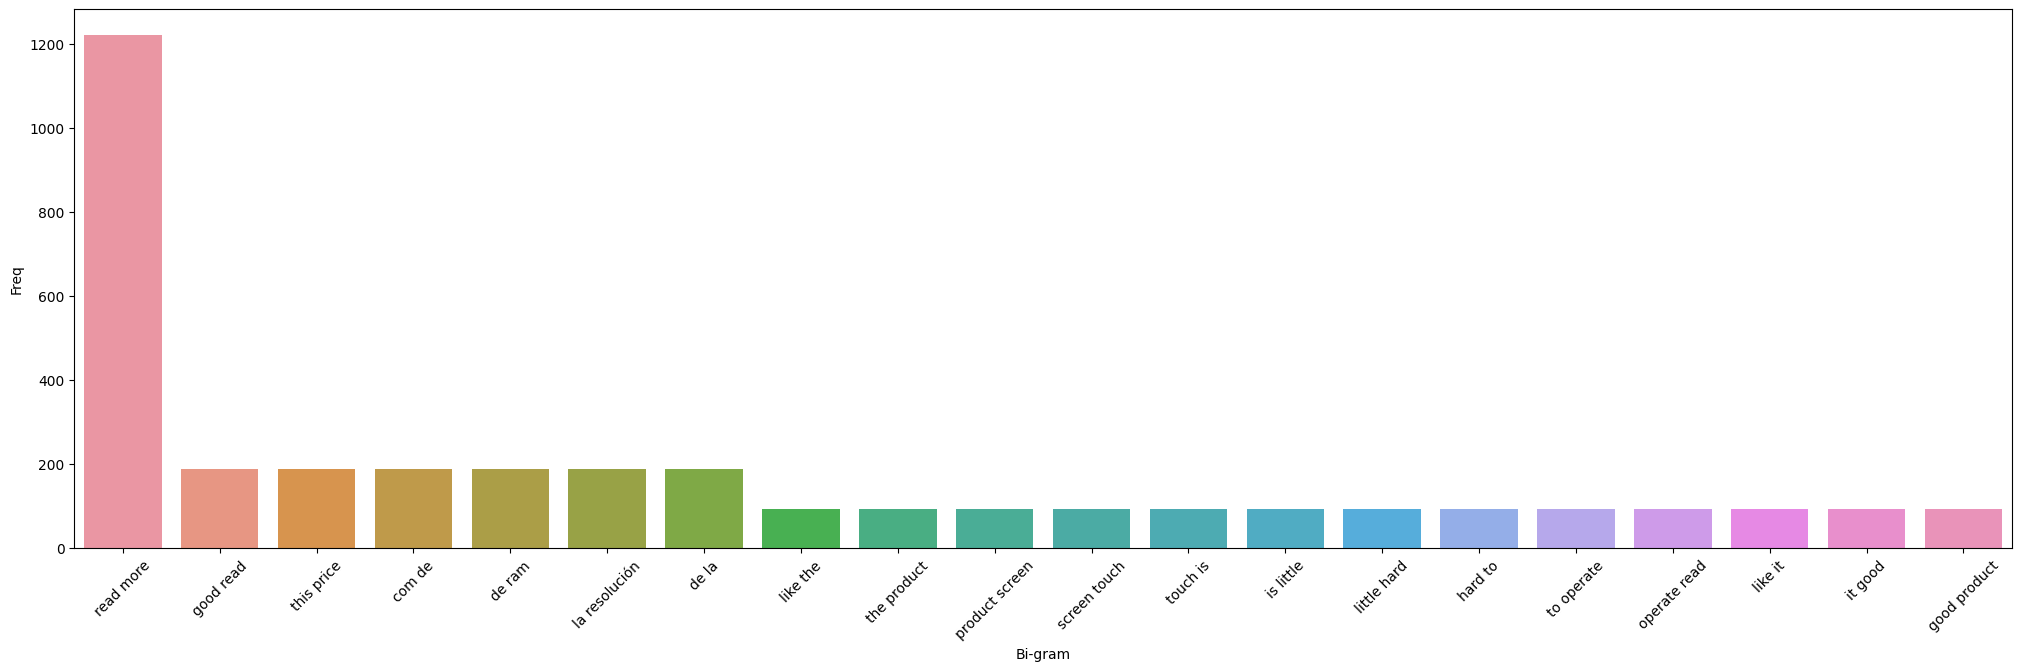

In [51]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [52]:
def get_top_n3_words(corpus, n=None):
 vec1 = CountVectorizer(ngram_range=(3,3),
 max_features=2000).fit(corpus)
 bag_of_words = vec1.transform(corpus)
 sum_words = bag_of_words.sum(axis=0)
 words_freq = [(word, sum_words[0, idx]) for word, idx in
 vec1.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1],
 reverse=True)
 return words_freq[:n]


In [53]:
top3_words = get_top_n3_words(df_new["Cleaned_Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,good read more,188
1,com de ram,188
2,like the product,94
3,the product screen,94
4,product screen touch,94
...,...,...
195,celular veio configurado,94
196,veio configurado mas,94
197,configurado mas eu,94
198,mas eu fiz,94


[Text(0, 0, 'good read more'),
 Text(1, 0, 'com de ram'),
 Text(2, 0, 'like the product'),
 Text(3, 0, 'the product screen'),
 Text(4, 0, 'product screen touch'),
 Text(5, 0, 'screen touch is'),
 Text(6, 0, 'touch is little'),
 Text(7, 0, 'is little hard'),
 Text(8, 0, 'little hard to'),
 Text(9, 0, 'hard to operate'),
 Text(10, 0, 'to operate read'),
 Text(11, 0, 'operate read more'),
 Text(12, 0, 'like it good'),
 Text(13, 0, 'it good product'),
 Text(14, 0, 'good product read'),
 Text(15, 0, 'product read more'),
 Text(16, 0, 'all in one'),
 Text(17, 0, 'in one with'),
 Text(18, 0, 'one with best'),
 Text(19, 0, 'with best battery')]

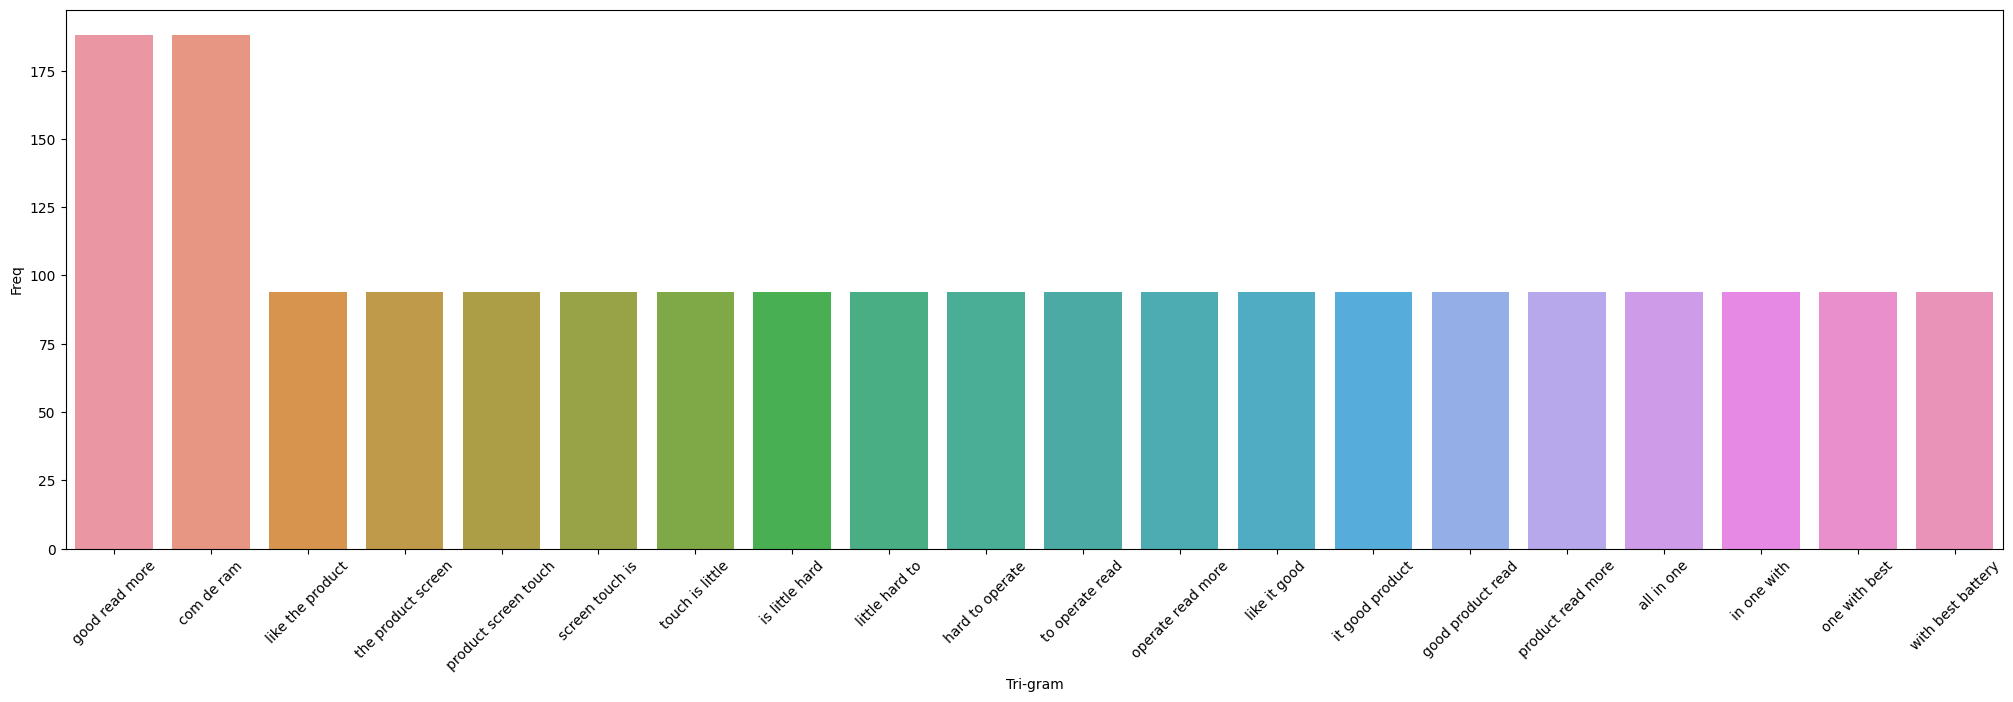

In [54]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [55]:
string_total = " ".join(df_new["Cleaned_Reviews"])
string_total[:2000]

'like the product screen touch is little hard to operate read more like it good product read more all in one with best battery 🔋 backup very much good read more its awesome phone under this price i got this mobile 464gb in just rs 7499 read more budget fraindly phone read more nice mobile phone at this price read more very nice pics value of money read more good read more produto bom pelo preço ótimo vendedor atencioso precisou trocar a cor do produto e me surpreendeu a cor nova eu amei vendedor mandou até um fone de brinde só não gostei que no app ake da amazon tava com 3 de ram e chegou um com 2 de ram do resto vale a pena read more amei meu produto superou as minhas expectativas camara muito boa tudo maravilhoso e ele em si e muito lindo e entrega super rapida read more todo bien con el paquete comento que la resolución del dispositivo es hd no full hd como dice el título read more producto que viene de la india no se que soporte tendra y el modelo no coincide en su totalidad es un 

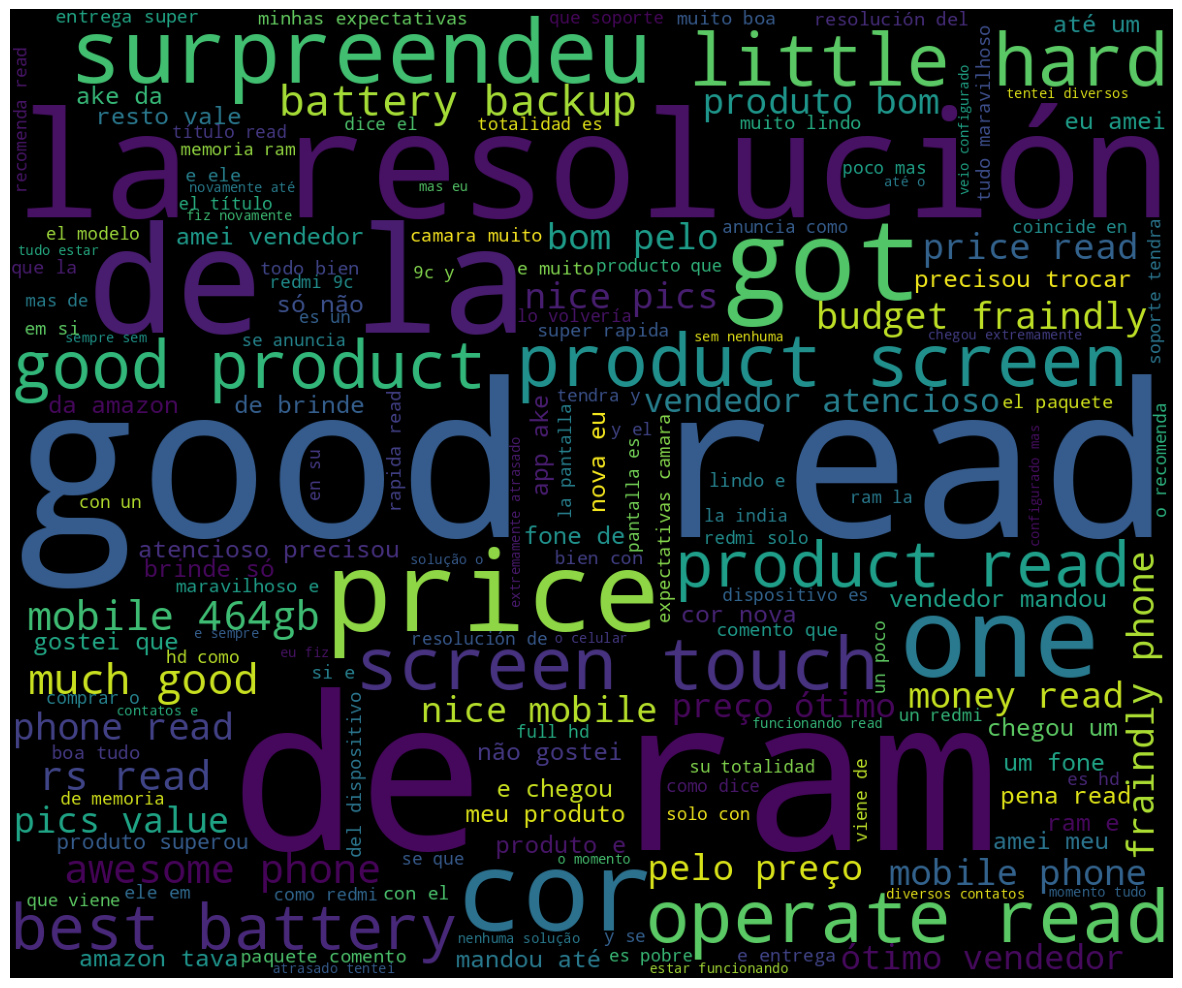

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_generator = WordCloud(background_color='black', width=1200, height=1000).generate(string_total)

fig = plt.figure(figsize=(15, 15))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()


In [57]:
def fetch_sentiment_using_textblob(text):
 analysis = TextBlob(text)
 return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [58]:
fetch_sentiment_using_textblob = df_new.Cleaned_Reviews.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Reviews
0.500000,376
0.600000,188
0.006944,94
0.733333,94
0.750000,94
0.550000,94
0.640000,94
0.416667,94
0.162500,94


In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [60]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_new.Cleaned_Reviews[4])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [61]:
df_score = pd.DataFrame()
df_score['Cleaned_Reviews'] = df_new.Cleaned_Reviews

sid = SentimentIntensityAnalyzer()
df_score['scores'] = df_new['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound'] = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >= 0.45 else ('Negative' if c <= -0.45 else 'Neutral'))

print(df_score)


                                        Cleaned_Reviews  \
0     like the product screen touch is little hard t...   
1                        like it good product read more   
2     all in one with best battery 🔋 backup very muc...   
3     its awesome phone under this price i got this ...   
4                       budget fraindly phone read more   
...                                                 ...   
1217  produto bom pelo preço ótimo vendedor atencios...   
1218  amei meu produto superou as minhas expectativa...   
1219  todo bien con el paquete comento que la resolu...   
1220  producto que viene de la india no se que sopor...   
1221  chegou extremamente atrasado tentei diversos c...   

                                                 scores  compound sentiment  
0     {'neg': 0.081, 'neu': 0.735, 'pos': 0.184, 'co...    0.3384   Neutral  
1     {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...    0.6597  Positive  
2     {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...  

In [62]:
df_score

,Cleaned_Reviews,scores,compound,sentiment
0,like the product screen touch is little hard t...,"{'neg': 0.081, 'neu': 0.735, 'pos': 0.184, 'co...",0.3384,Neutral
1,like it good product read more,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",0.6597,Positive
2,all in one with best battery 🔋 backup very muc...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.8115,Positive
3,its awesome phone under this price i got this ...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.6249,Positive
4,budget fraindly phone read more,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
1217,produto bom pelo preço ótimo vendedor atencios...,"{'neg': 0.043, 'neu': 0.923, 'pos': 0.033, 'co...",-0.1280,Neutral
1218,amei meu produto superou as minhas expectativa...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.5994,Positive
1219,todo bien con el paquete comento que la resolu...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2960,Neutral
1220,producto que viene de la india no se que sopor...,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp...",-0.6808,Negative


In [63]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5).generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


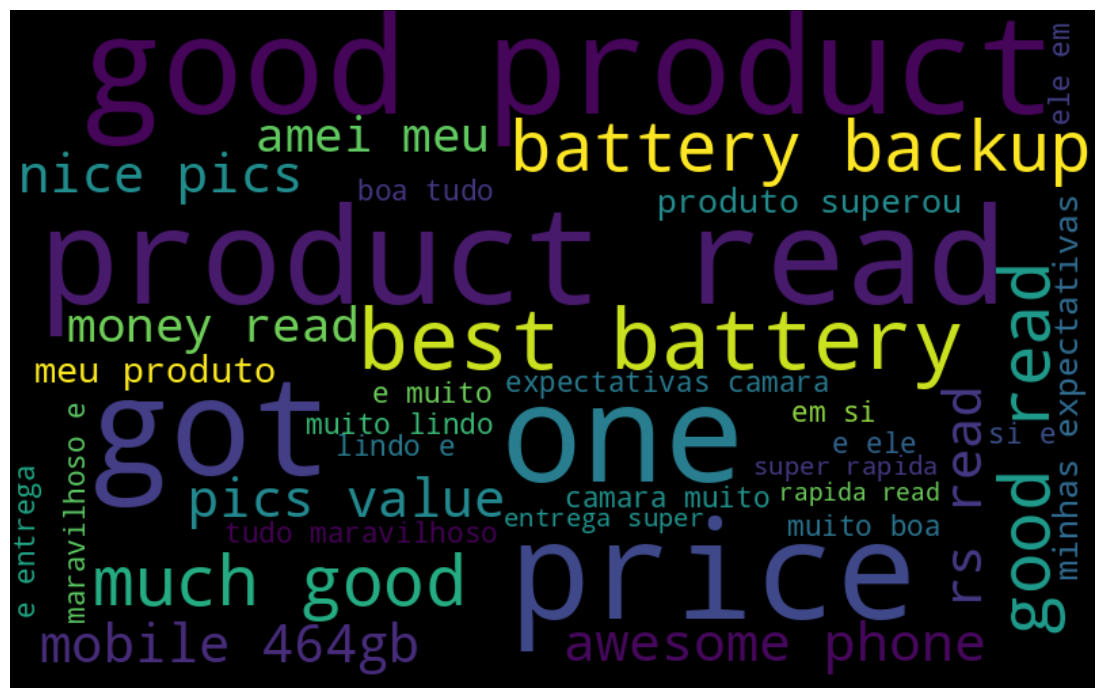

In [64]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

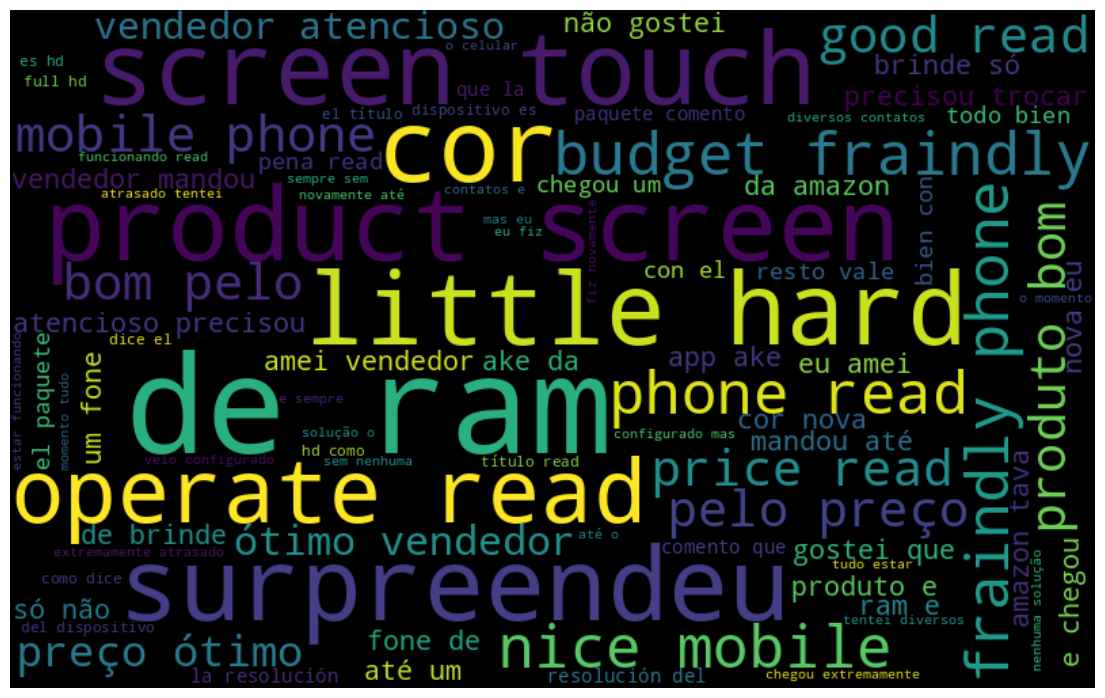

In [65]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Neutral']])
generate_wordcloud(all_words)

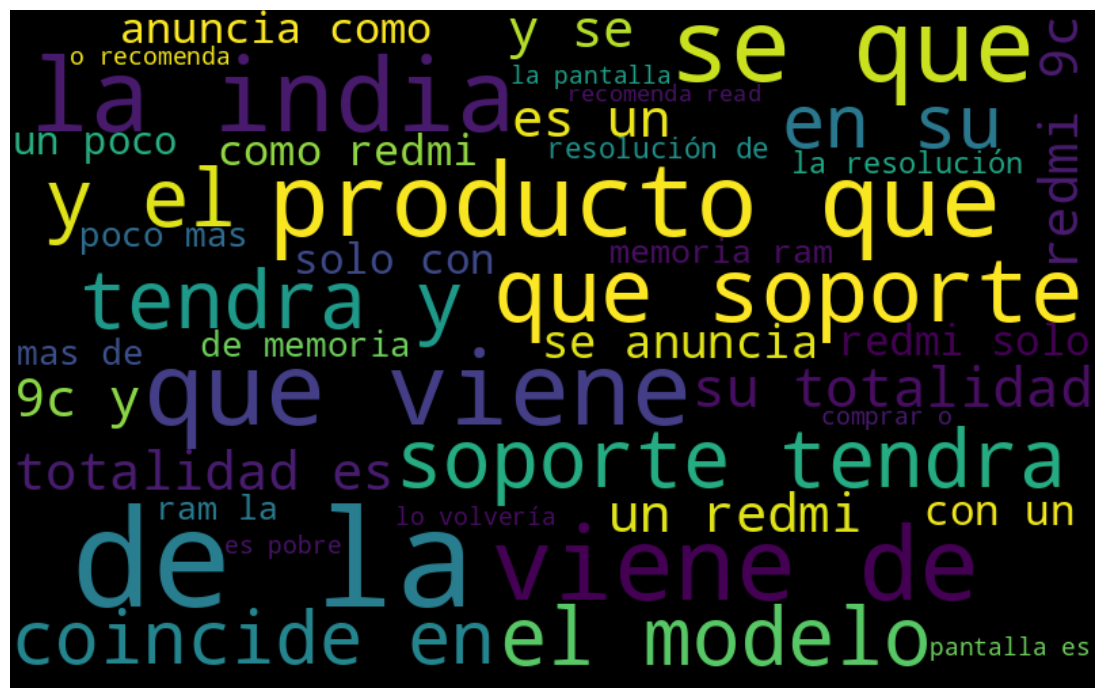

In [66]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Negative']])
generate_wordcloud(all_words)

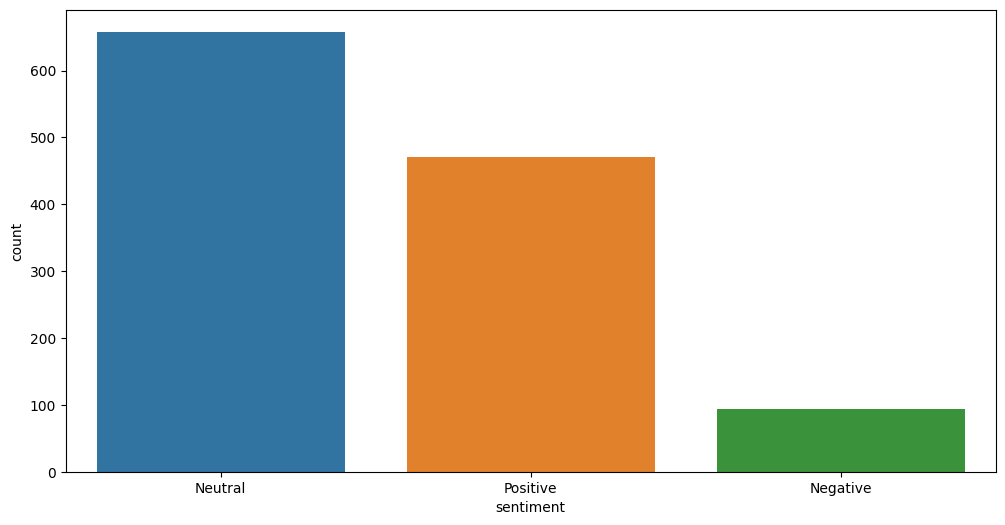

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)
plt.show()

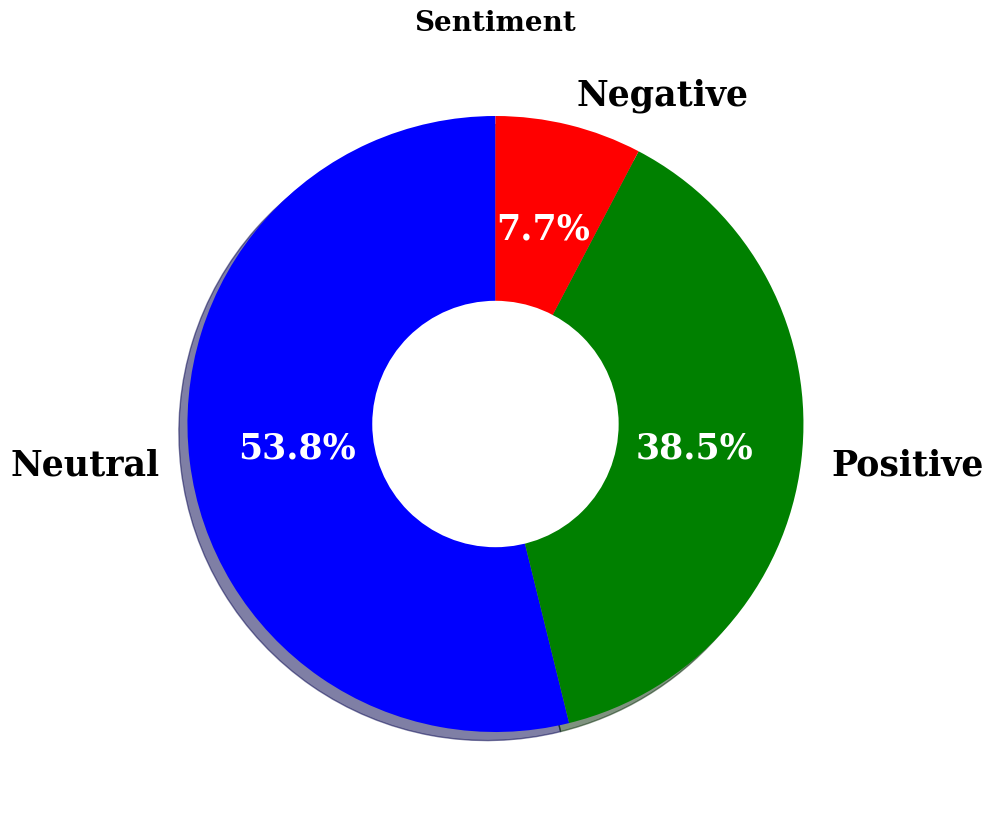

In [68]:
label_data = df_score['sentiment'].value_counts()
explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
 labels = label_data.index,
 colors = ['blue','green','red'],
 pctdistance = 0.65,
 shadow = True,
 startangle = 90,
 explode = None,
 autopct = '%1.1f%%',
 textprops={ 'fontsize': 25,
 'color': 'black',
'weight': 'bold',
'family': 'serif' })
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment', size=20, **hfont)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()